In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()  
data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CM       32 non-null     int64  
 1   DA       32 non-null     int64  
 2   TMR      32 non-null     float64
 3   Comp1    32 non-null     float64
 4   Comp2-%  32 non-null     float64
 5   Capa1    32 non-null     float64
 6   Capa2-%  32 non-null     int64  
 7   Conf1    32 non-null     float64
 8   Conf2-%  32 non-null     int64  
dtypes: float64(5), int64(4)
memory usage: 2.4 KB


In [7]:
data.dropna(inplace=True)

data = pd.get_dummies(data)

X = data.drop('CM', axis=1)
X = data.drop('DA', axis=1)
y = data['TMR']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [18]:
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [19]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 3.086614285714274e-06
R-squared: 0.9881895908168047


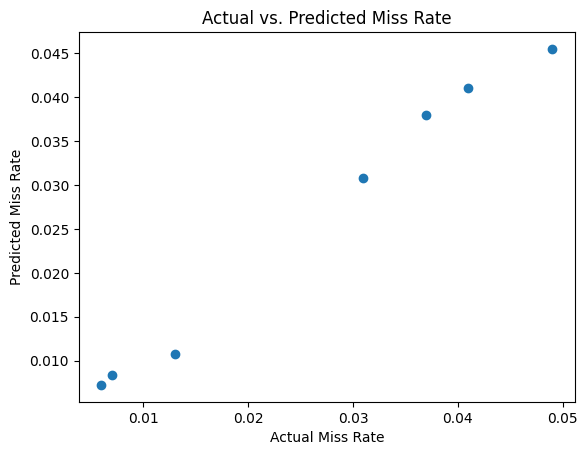

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Miss Rate')
plt.ylabel('Predicted Miss Rate')
plt.title('Actual vs. Predicted Miss Rate')
plt.show()
